In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm
from datetime import datetime, timedelta,date

# Impoting DataSets From github

In [2]:
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_confirmed = df_confirmed.drop(['Lat', 'Long'],axis=1)
df_confirmed.head(3)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778
1,NaN,Albania,0,0,0,0,0,0,0,0,...,766,773,782,789,795,803,820,832,842,850
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369


In [3]:
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
df_covid19.head(3)

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Australia,2020-05-09 11:32:32,-25.0000,133.0000,6929,97,6134,698,27.215560,NaN,NaN,1.399913,36,AUS
1,Austria,2020-05-09 11:32:32,47.5162,14.5501,15833,615,13928,1290,175.797211,NaN,NaN,3.884292,40,AUT
2,Canada,2020-05-09 11:32:32,60.0010,-95.0010,67674,4697,30239,32738,178.768313,NaN,NaN,6.940627,124,CAN


# Cleaning Data

In [4]:
df_covid19 = df_covid19.drop(["People_Tested","People_Hospitalized","UID","ISO3","Mortality_Rate", "Lat", "Long_"],axis =1)
df_covid19['Country_Region'].replace(['United Kingdom'], ['UK'], inplace=True)

# Corona Virus Spread Across Globe Over Time

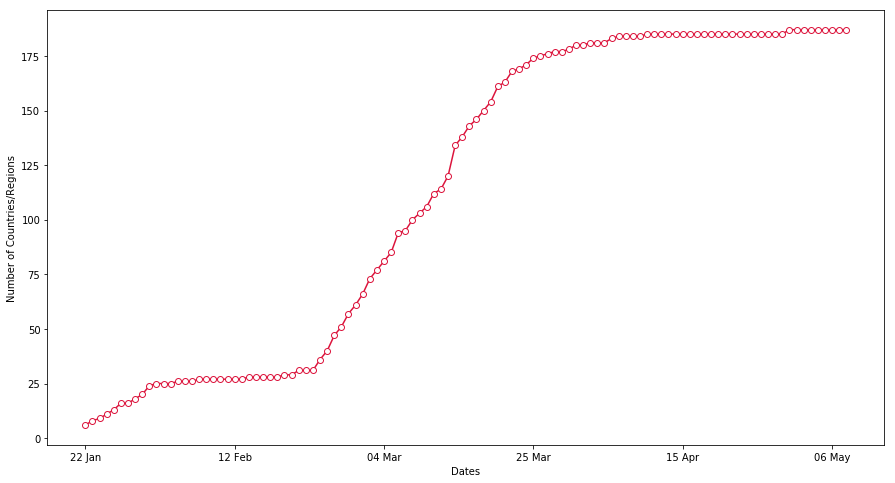

In [5]:
case_nums_country = df_confirmed.groupby("Country/Region").sum().apply(lambda x: x[x > 0].count(), axis =0)
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in case_nums_country.index]
plt.figure(figsize=(15, 8))
plt.plot(d, case_nums_country, color='crimson', linestyle='-', marker='o', markersize=6, markerfacecolor='#ffffff')

plt.xlabel("Dates")
plt.ylabel("Number of Countries/Regions")
plt.xticks(list(np.arange(0,len(d),int(len(d)/5))),d[:-1:int(len(d)/5)]+[d[-1]])

plt.savefig('Growth.png', dpi=500)
plt.show()


# Top 10 Countries

### Highest Number of Confirmed Cases

In [6]:
df_covid19.sort_values(by='Confirmed', ascending=False, inplace=True)
top_10_cases = df_covid19.head(10)

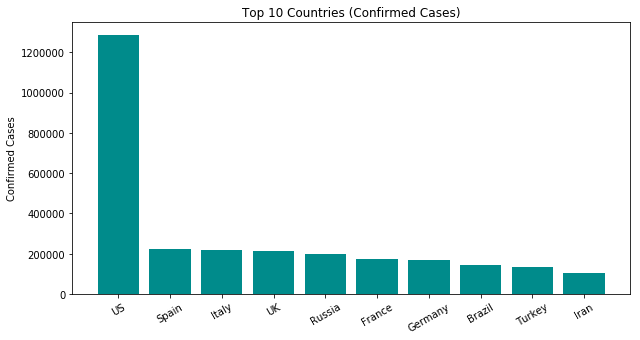

In [7]:
plt.figure(figsize=(10, 5))
plt.bar('Country_Region', 'Confirmed', data=top_10_cases, color='darkcyan')

plt.ylabel('Confirmed Cases')
plt.title("Top 10 Countries (Confirmed Cases)")

plt.xticks(rotation=30)
plt.savefig('Confirmed.png', dpi=500)
plt.show()

### Highest Number of Deaths Reported

In [8]:
df_covid19.sort_values(by='Deaths', ascending=False, inplace=True)
top_10_deaths = df_covid19.head(10)

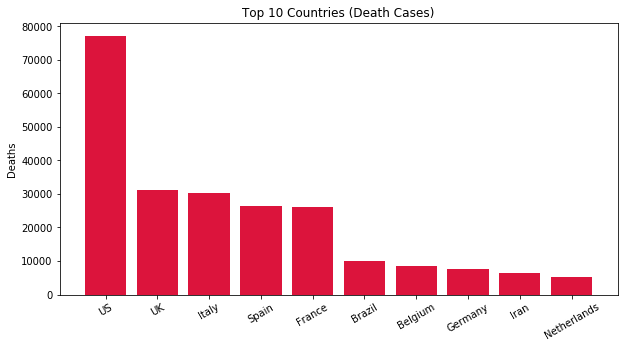

In [9]:
plt.figure(figsize=(10, 5))
plt.bar('Country_Region', 'Deaths', data=top_10_deaths, color='crimson')

plt.ylabel('Deaths')
plt.title("Top 10 Countries (Death Cases)")

plt.xticks(rotation=30)
plt.savefig('Deaths.png', dpi=500)
plt.show()

### Highest Number Of Pending Cases

In [10]:
df_covid19.sort_values(by='Active', ascending=False, inplace=True)
top_10_active = df_covid19.head(10)

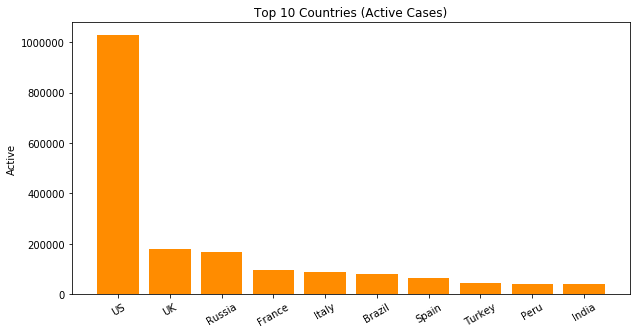

In [11]:
plt.figure(figsize=(10, 5))
plt.bar('Country_Region', 'Active', data=top_10_active, color='darkorange')

plt.ylabel('Active')
plt.title("Top 10 Countries (Active Cases)")

plt.xticks(rotation=30)
plt.savefig('Active.png', dpi=500)
plt.show()

### Highest Number Of Recovered Cases

In [12]:
df_covid19.sort_values(by='Recovered', ascending=False, inplace=True)
top_10_recovered = df_covid19.head(10)

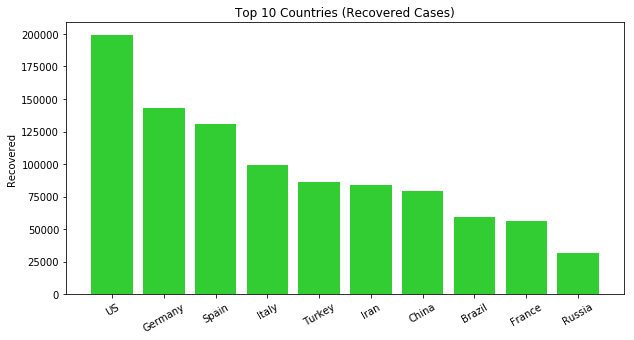

In [13]:
plt.figure(figsize=(10, 5))
plt.bar('Country_Region', 'Recovered', data=top_10_recovered, color='limegreen')

plt.ylabel('Recovered')
plt.title("Top 10 Countries (Recovered Cases)")

plt.xticks(rotation=30)
plt.savefig('Recovered.png', dpi=500)
plt.show()

### Highest Recovery Rate For Total Closed Cases

    For Countries that reported most recovered cases which has the highest percentage of recoveries out of closed cases.

In [14]:
top_10_recovered['Percentage Recovered'] = top_10_recovered['Recovered']/(top_10_recovered['Confirmed'] - top_10_recovered['Active']) * 100

top_10_recovered.sort_values(by='Percentage Recovered', ascending=False, inplace=True)

C:\Users\Usharab\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Usharab\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


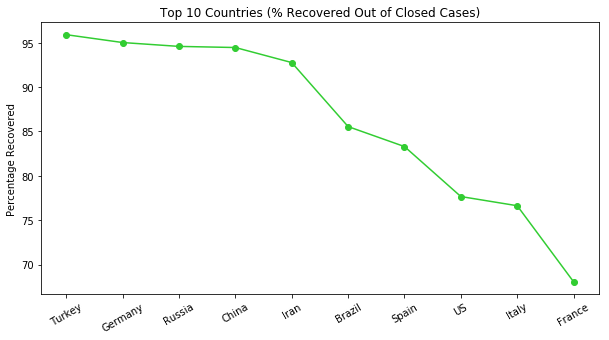

In [15]:
plt.figure(figsize=(10, 5))
plt.plot('Country_Region', 'Percentage Recovered', data=top_10_recovered, color='limegreen', marker='o')

plt.ylabel('Percentage Recovered')
plt.title("Top 10 Countries (% Recovered Out of Closed Cases)")

plt.xticks(rotation=30)
plt.savefig('Recovery_Rate.png', dpi=500)
plt.show()

### Highest Death Rate For Total Closed Cases

    For Countries that reported most death cases which has the highest percentage of death cases out of closed cases?

In [16]:
top_10_deaths['Percentage Deaths'] = top_10_deaths['Deaths']/(top_10_deaths['Confirmed'] - top_10_deaths['Active']) * 100

top_10_deaths.sort_values(by='Percentage Deaths', ascending=False, inplace=True)

C:\Users\Usharab\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Usharab\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


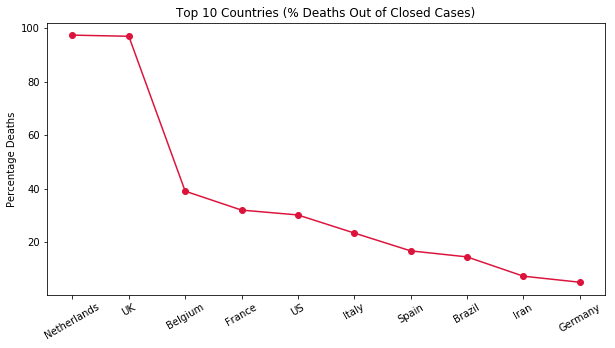

In [17]:
plt.figure(figsize=(10, 5))
plt.plot('Country_Region', 'Percentage Deaths', data=top_10_deaths, color='crimson', marker='o')

plt.ylabel('Percentage Deaths')
plt.title("Top 10 Countries (% Deaths Out of Closed Cases)")

plt.xticks(rotation=30)
plt.savefig('Death_Rate.png', dpi=500)
plt.show()

# Global Average of Confirmed Cases & Number of Countries Above Global Average

In [18]:
print('Number OF Countries Effected By Corona: ', df_covid19.Confirmed.describe()['count'])
print('Mean OF Corfirmed Cases: ', df_covid19.Confirmed.describe()['mean'])

confirmed = df_covid19['Confirmed']
confirmed = confirmed[df_covid19.Confirmed > df_covid19.Confirmed.mean()]
print('Countries With More Confirmed Cases than Global Mean: ', confirmed.describe()['count'])

Number OF Countries Effected By Corona:  187.0
Mean OF Corfirmed Cases:  21152.320855614973
Countries With More Confirmed Cases than Global Mean:  26.0


# Global Average of Active Cases & Number of Countries Above Global Average

In [19]:
print('Mean of Global Active Cases: ', df_covid19.Active.describe()['mean'])

active = df_covid19['Active']
active = active[df_covid19.Active > df_covid19.Active.mean()]
print('Countries With More Active Cases than Global Mean:', active.describe()['count'])

Mean of Global Active Cases:  12664.283422459894
Countries With More Active Cases than Global Mean: 25.0


# Global Average of Death & Number of Countries Above Global Average

In [20]:
print('Mean of Global Deaths: ', df_covid19.Deaths.describe()['mean'])

deaths = df_covid19['Deaths']
deaths = deaths[df_covid19.Deaths > df_covid19.Deaths.mean()]
print('Countries With More Deaths than Global Mean:', deaths.describe()['count'])

Mean of Global Deaths:  1471.5935828877004
Countries With More Deaths than Global Mean: 20.0


# Global Recovery Rate For Closed Cases & Number of Countries Above Global Rate

In [21]:
global_percent = df_covid19['Recovered'].sum()/(df_covid19['Confirmed'].sum() - df_covid19['Active'].sum()) * 100
print("Global Recovery Rate For CLosed Cases: {} %".format(round(global_percent, 2)))

country_wise = df_covid19['Recovered']/(df_covid19['Confirmed'] - df_covid19['Active']) * 100
country_wise = country_wise[country_wise > global_percent]
print('Number of Countries with Recovery Rate Greater than Global Rate: ',country_wise.describe()['count'])

Global Recovery Rate For CLosed Cases: 83.92 %
Number of Countries with Recovery Rate Greater than Global Rate:  144.0


# Global Death Rate For Closed Cases & Number of Countries Above Global Rate

In [22]:
global_percent = df_covid19['Deaths'].sum()/(df_covid19['Confirmed'].sum() - df_covid19['Active'].sum()) * 100
print("Global Percentage Deaths Out of CLosed Cases: {} %".format(round(global_percent, 2)))

country_wise = df_covid19['Deaths']/(df_covid19['Confirmed'] - df_covid19['Active']) * 100
country_wise = country_wise[country_wise > global_percent]
print('Number of Countries with Death Rate Greater than Global Rate: ',country_wise.describe()['count'])

Global Percentage Deaths Out of CLosed Cases: 17.34 %
Number of Countries with Death Rate Greater than Global Rate:  40.0


# Fraction Of Confirmed Cases to Global Confirmed Cases

In [23]:
df_covid19['Fraction_Confirmed'] = round((df_covid19['Confirmed']/df_covid19['Confirmed'].sum())*100, 2)
df_covid19.sort_values(by='Fraction_Confirmed', ascending=False, inplace=True)
fraction_confirmed = df_covid19.head(10)

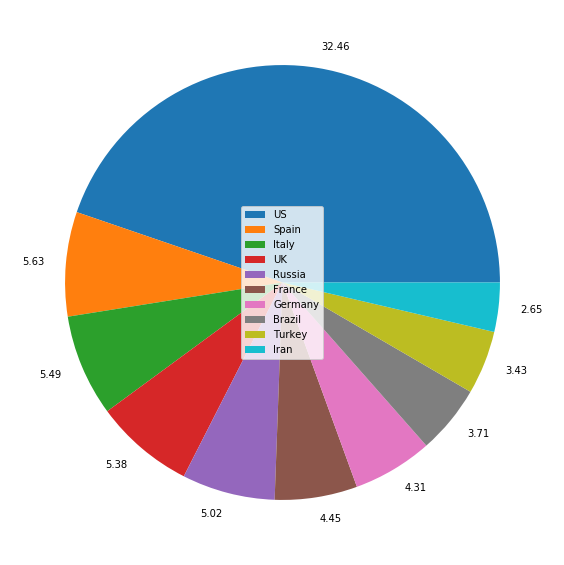

In [24]:
plt.figure(figsize=(10, 10))
plt.pie(fraction_confirmed['Fraction_Confirmed'], labels=fraction_confirmed['Fraction_Confirmed'])
plt.legend(fraction_confirmed['Country_Region'], loc='center')
plt.savefig('Fraction_Confirmed.png', dpi=500)
plt.show()

# Fraction Of Active Cases to Global Active Cases

In [25]:
df_covid19['Fraction_Active'] = round((df_covid19['Active']/df_covid19['Active'].sum())*100, 2)
df_covid19.sort_values(by='Fraction_Active', ascending=False, inplace=True)
fraction_active = df_covid19.head(10)

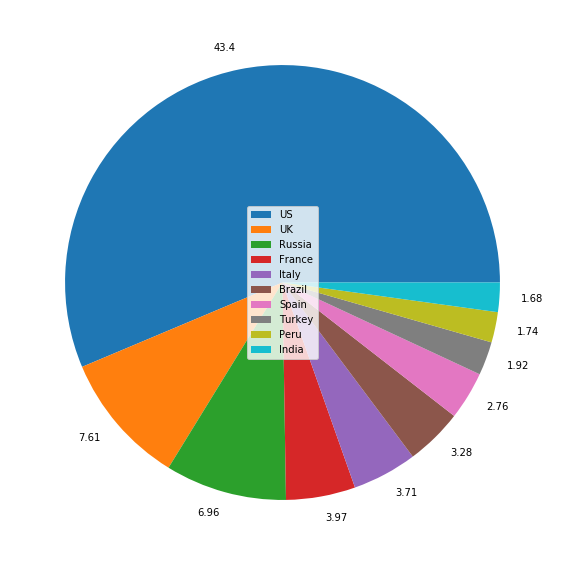

In [26]:
plt.figure(figsize=(10, 10))
plt.pie(fraction_active['Fraction_Active'], labels=fraction_active['Fraction_Active'])
plt.legend(fraction_active['Country_Region'], loc='center')
plt.savefig('Fraction_Active.png', dpi=500)
plt.show()

# Fraction Of Recovered Cases to Global Recovered Cases

In [27]:
df_covid19['Fraction_Recovered'] = round((df_covid19['Recovered']/df_covid19['Recovered'].sum())*100, 2)
df_covid19.sort_values(by='Fraction_Recovered', ascending=False, inplace=True)
fraction_recovered = df_covid19.head(10)

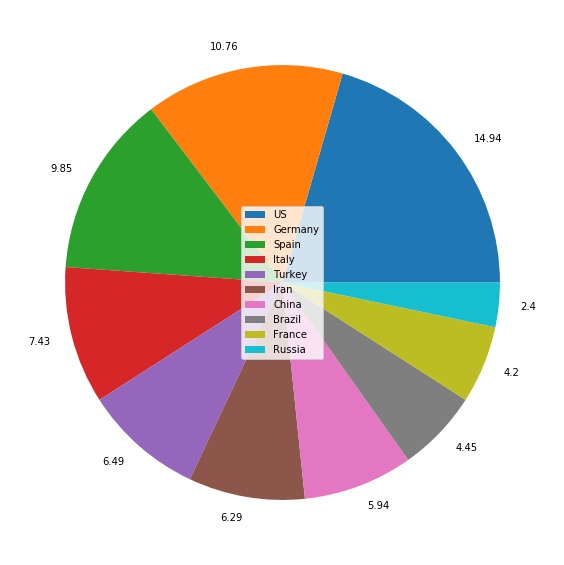

In [28]:
plt.figure(figsize=(10, 10))
plt.pie(fraction_recovered['Fraction_Recovered'], labels=fraction_recovered['Fraction_Recovered'])
plt.legend(fraction_recovered['Country_Region'], loc='center')
plt.savefig('Fraction_Recovered.png', dpi=500)
plt.show()


# Fraction Of Deaths to Global Deaths

In [29]:
df_covid19['Fraction_Deaths'] = round((df_covid19['Deaths']/df_covid19['Deaths'].sum())*100, 2)
df_covid19.sort_values(by='Fraction_Deaths', ascending=False, inplace=True)
fraction_deaths = df_covid19.head(10)

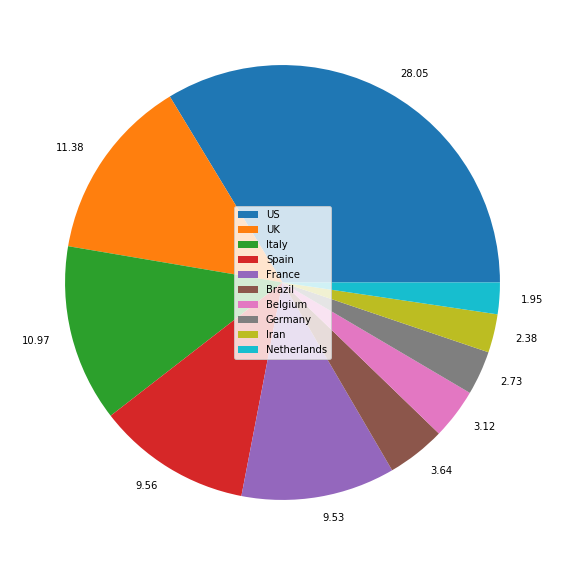

In [30]:
plt.figure(figsize=(10, 10))
plt.pie(fraction_deaths['Fraction_Deaths'], labels=fraction_deaths['Fraction_Deaths'])
plt.legend(fraction_deaths['Country_Region'], loc='center')
plt.savefig('Fraction_Deaths.png', dpi=500)
plt.show()